# SMA ROC Portfolio

    1. The Security is above its 200-day moving average
    2. The Security closes with sma_roc > 0, buy.
    3. If the Security closes with sma_roc < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Yahoo finance cryptocurrencies:  
https://finance.yahoo.com/cryptocurrencies/

10 largest Crypto currencies from 5 years ago:  
https://coinmarketcap.com/historical/20160626/   

10 largest Crypto currencies from 4 years ago:  
https://coinmarketcap.com/historical/20170625/

10 largest Crypto currencies from 3 years ago:  
https://coinmarketcap.com/historical/20180624/

10 largest Crypto currencies from 2 years ago:  
https://coinmarketcap.com/historical/20190630/

Some global data

In [3]:
# Symbol Lists

BitCoin = ['BTC-USD']
CryptoCurrencies_2016 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD',
                         'XEM-USD', 'DASH-USD', 'MAID-USD', 'LSK-USD', 'DOGE-USD']
# 'DAO-USD' is a dead coin, so missing from above


CryptoCurrencies_2017 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'ETC-USD',
                         'XEM-USD', 'MIOTA-USD', 'DASH-USD', 'BTS-USD']
# 'STRAT-USD' last trade date is 2020-11-18, so removed


CryptoCurrencies_2018 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'EOS-USD',
                         'LTC-USD', 'XLM-USD', 'ADA-USD', 'TRX-USD', 'MIOTA-USD']

CryptoCurrencies_2019 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD',
                         'EOS-USD', 'BNB-USD', 'USDT-USD', 'BSV-USD', 'CRO-USD']


Stocks_Bonds_Gold_Crypto = ['SPY', 'QQQ', 'TLT', 'GLD', 'BTC-USD']
# Set 'continuous_timeseries' : False (for mixed asset classes)


start_1900 = datetime.datetime(1900, 1, 1)
start_2016 = datetime.datetime(2016, 6, 26)
start_2017 = datetime.datetime(2017, 6, 25)
start_2018 = datetime.datetime(2018, 6, 24)
start_2019 = datetime.datetime(2019, 6, 30)


# Pick one of the above symbols and start pairs
symbols = CryptoCurrencies_2016
start = start_2016

capital = 10000
end = datetime.datetime.now()

In [4]:
# NOTE: Cryptocurrencies have 7 days a week timeseries.  You can test them with
# their entire timeseries by setting stock_market_calendar=False.  Alternatively,
# to trade with stock market calendar by setting stock_market_calendar=True.
# For mixed asset classes that include stocks or ETFs, you must set
# stock_market_calendar=True.

options = {
    'use_adj' : False,
    'use_cache' : True,
    'use_continuous_calendar' : False,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 0,
    'use_regime_filter' : False,
    'use_vola_weight' : True
}

Define Optimizations

In [5]:
# pick one
optimize_sma_timeperiod  = False
optimize_sma_pct_band    = True

# define SMAs ranges
if optimize_sma_timeperiod:
    Xs = range(5, 40, 5)
    Xs = [str(X) for X in Xs]

# define band ranges
elif optimize_sma_pct_band:
    Xs = range(0, 11, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_sma_timeperiod:
        options['sma_timeperiod'] = int(X)
    elif optimize_sma_pct_band:
        options['sma_pct_band'] = int(X)
    
    strategies[X] = strategy.Strategy(symbols, capital, start, end, options)
    strategies[X].run()

0 1 2 3 4 5 6 7 8 9 10 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,0,1,2,3,4,5,6,7,8,9,10
annual_return_rate,64.65,60.67,74.91,67.58,72.00,70.19,72.83,56.72,56.07,59.79,92.42
max_closed_out_drawdown,-56.03,-50.74,-53.27,-54.88,-53.65,-52.40,-53.88,-56.82,-56.66,-60.06,-65.40
annualized_return_over_max_drawdown,1.15,1.20,1.41,1.23,1.34,1.34,1.35,1.00,0.99,1.00,1.41
best_month,198.49,201.92,282.21,285.31,284.26,277.81,283.95,210.83,207.04,209.24,395.62
worst_month,-43.32,-42.03,-42.02,-38.16,-38.13,-38.12,-39.90,-40.06,-40.23,-40.40,-42.95
sharpe_ratio,1.07,1.04,1.00,0.95,0.99,0.96,0.98,0.97,0.97,1.00,1.19
sortino_ratio,1.44,1.41,1.69,1.61,1.68,1.68,1.70,1.39,1.37,1.43,1.75
monthly_std,25.66,25.76,33.26,31.95,31.54,32.05,32.56,25.99,25.59,26.01,41.10
pct_time_in_market,83.67,83.12,83.39,83.39,84.31,84.85,84.76,85.49,86.04,86.41,87.86
total_num_trades,424.00,307.00,235.00,200.00,173.00,159.00,140.00,128.00,119.00,107.00,102.00


Bar graphs

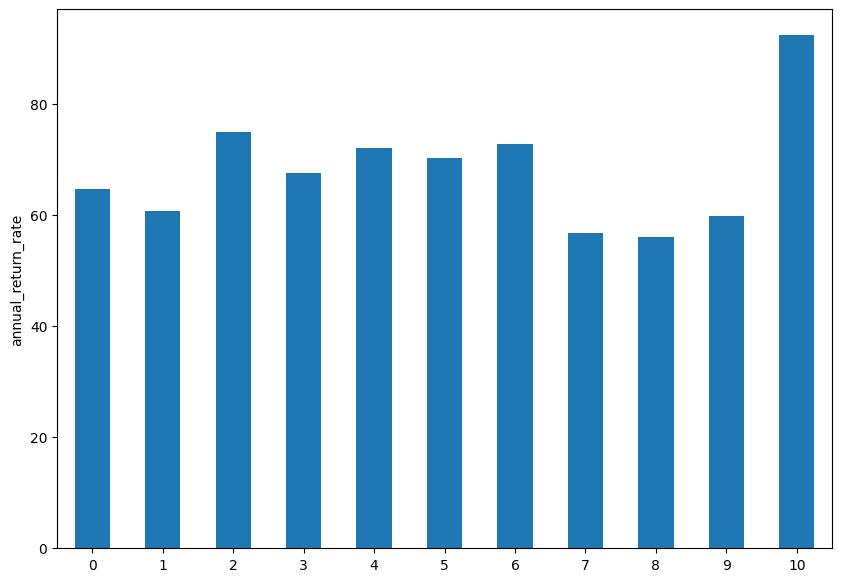

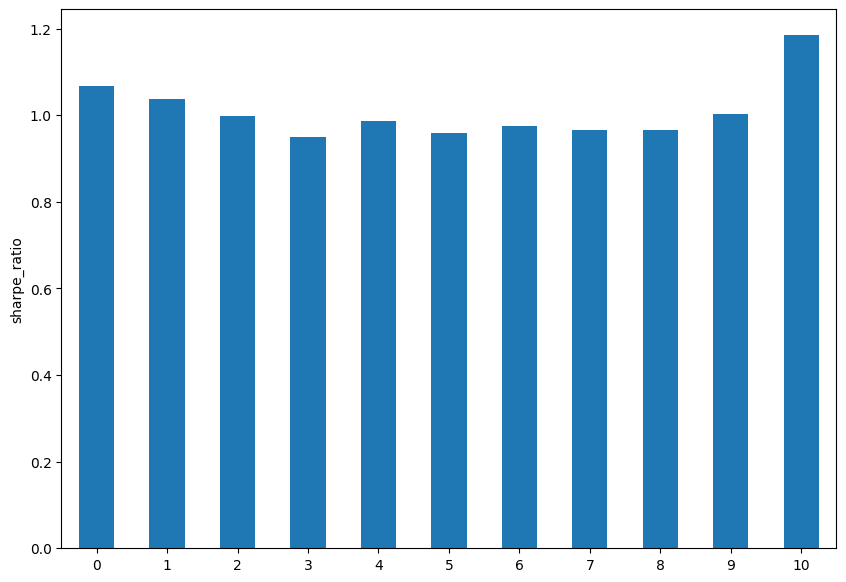

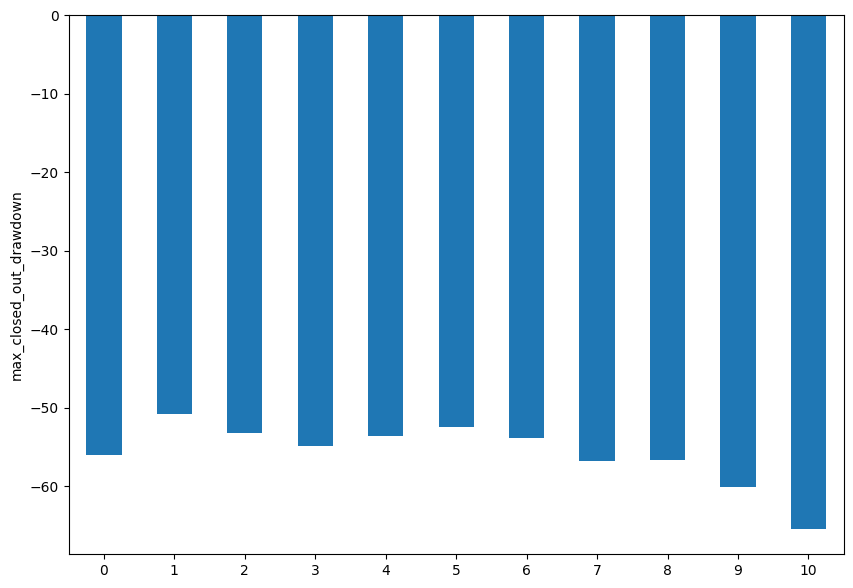

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('BTC-USD', capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

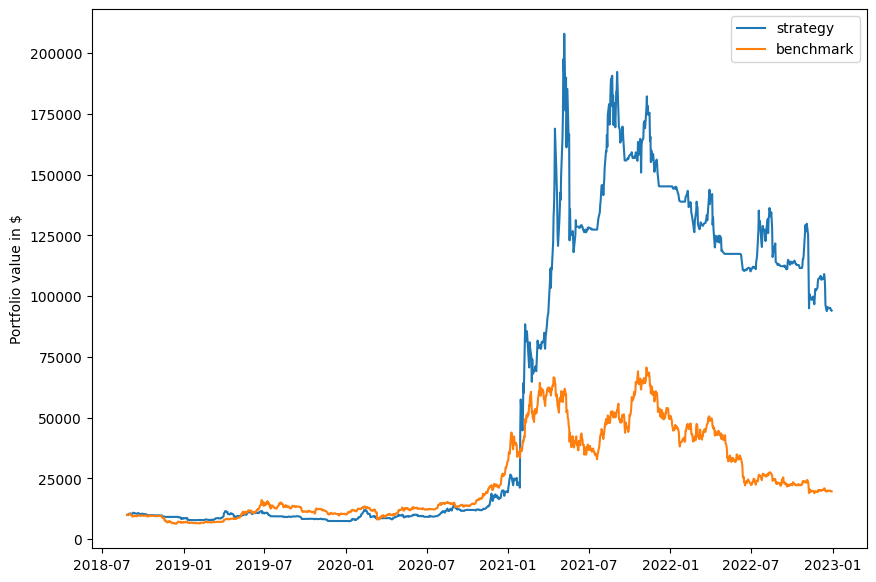

In [10]:
if   optimize_sma_timeperiod: Y = '20'
elif optimize_sma_pct_band: Y = '3'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

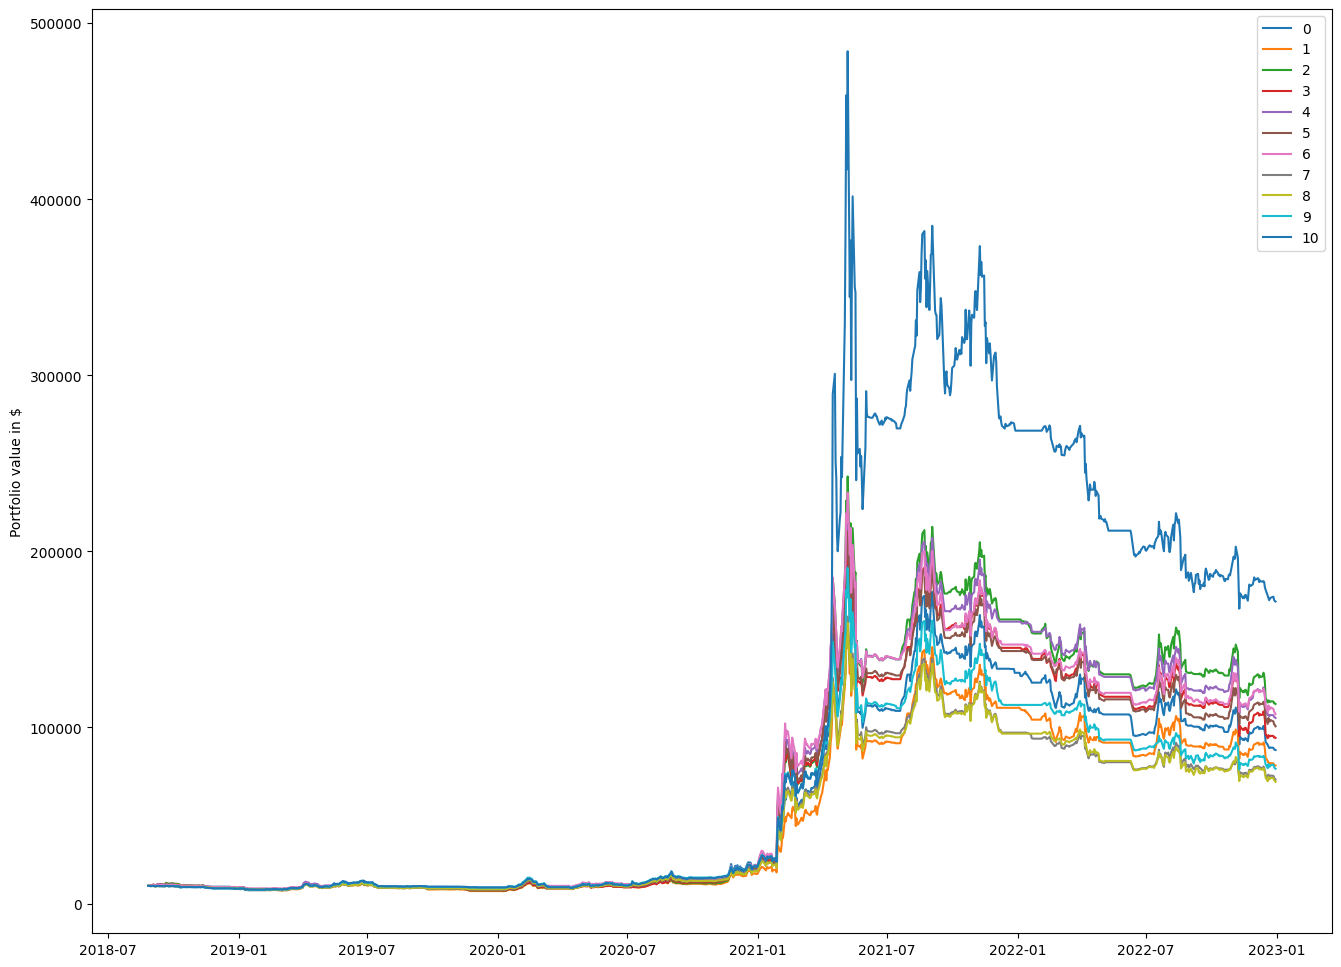

In [11]:
labels = []
for strategy in strategies:
    if optimize_sma_timeperiod:
        label = strategy.options['sma_timeperiod']
    elif optimize_sma_pct_band:
        label = strategy.options['sma_pct_band']
    labels.append(label)

pf.plot_equity_curves(strategies, labels)